In [78]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [79]:
df = pd.read_csv('/Users/priyanshiagarwal/Downloads/Country-data.csv')

In [80]:
columns_names=df.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


In [81]:
df.shape

(167, 10)

In [82]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [83]:
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


Text(0.5, 1.0, 'Correlation between different fearures')

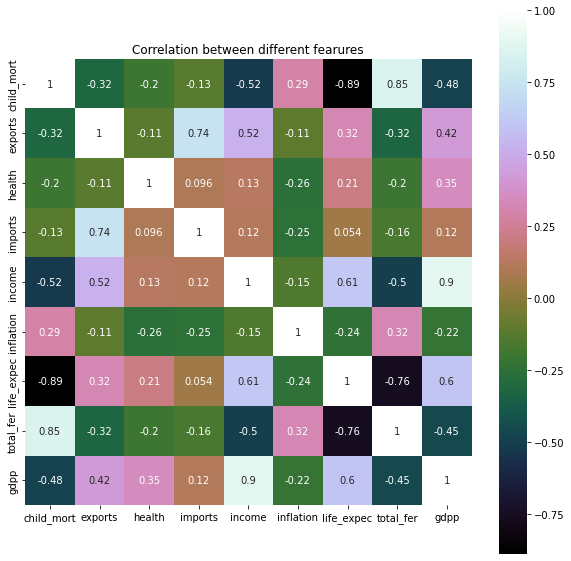

In [84]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [87]:
df_drop=df.drop(labels=['country'],axis=1)
df_drop.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [88]:
cols = df_drop.columns.tolist()
cols

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [90]:
df_drop = df_drop.reindex(columns= cols)

In [91]:
X = df_drop.iloc[:,1:8].values
y = df_drop.iloc[:,0].values
X

array([[10.  ,  7.58, 44.9 , ...,  9.44, 56.2 ,  5.82],
       [28.  ,  6.55, 48.6 , ...,  4.49, 76.3 ,  1.65],
       [38.4 ,  4.17, 31.4 , ..., 16.1 , 76.5 ,  2.89],
       ...,
       [72.  ,  6.84, 80.2 , ..., 12.1 , 73.1 ,  1.95],
       [30.  ,  5.18, 34.4 , ..., 23.6 , 67.5 ,  4.67],
       [37.  ,  5.89, 30.9 , ..., 14.  , 52.  ,  5.4 ]])

In [92]:
y

array([ 90.2,  16.6,  27.3, 119. ,  10.3,  14.5,  18.1,   4.8,   4.3,
        39.2,  13.8,   8.6,  49.4,  14.2,   5.5,   4.5,  18.8, 111. ,
        42.7,  46.6,   6.9,  52.5,  19.8,  10.5,  10.8, 116. ,  93.6,
        44.4, 108. ,   5.6,  26.5, 149. , 150. ,   8.7,  15.7,  18.6,
        88.2, 116. ,  63.9,  10.2, 111. ,   5.5,   3.6,   3.4,   4.1,
        34.4,  25.1,  29.1,  19.2, 111. ,  55.2,   4.5,  24.1,   3. ,
         4.2,  63.7,  80.3,  16.5,   4.2,  74.7,   3.9,  14.6,  35.4,
       109. , 114. ,  37.6, 208. ,   6. ,   2.6,  58.8,  33.3,  19.3,
        36.9,   4.2,   4.6,   4. ,  18.1,   3.2,  21.1,  21.5,  62.2,
        62.7,  10.8,  29.6,  78.9,   7.8,  10.3,  99.7,  89.3,  16.6,
         6.1,   2.8,  10.4,  62.2,  90.5,   7.9,  13.2, 137. ,   6.8,
        97.4,  15. ,  40. ,  17.2,  26.1,   6.8,  33.5, 101. ,  64.4,
        56. ,  47. ,   4.5,   6.2, 123. , 130. ,   3.2,  11.7,  92.1,
        19.7,  24.1,  20.3,  31.9,   6. ,   3.9,   9. ,  11.5,  10. ,
        63.6,  18.9,